In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi


df = pd.read_csv('Rotman MMA Summer Datathon.csv')
#filtering for data for women only
women_data = df[df['team_name'].str.contains("Women") & df['team_name'].str.contains("Canada")]
#women_data.head()
#women_data.columns

def div_safe(x,y):
    try:
        return x/y
    except ZeroDivisionError:
        return 0



In [53]:
#----------------------------Event Type Specialist Selection----------------------------

# Description: The coaches would like to select five top players.  
# The players should, ideally, excel in all areas of the game.  
# Since scoring goals is the ultimate objective, at least three 
# should be excellent goal scorers and at least two should be excellent passers.  
# In addition, you need at least two faceoff specialists and one takeaway specialist.  
# It would be especially beneficial if the passers were familiar with the shooting specialists 
# (i.e., had a good track record of completing passes to these players). 

#nested dictionary
names_AllEvents = dict()
name_SuccessEvent = dict()
name_SuccessEventRate = dict()
#events_dic = dict()


#i for index, j as content
for i , j in women_data.iterrows():
    # field of interest
    name = women_data.loc[i]['player_name']
    event = women_data.loc[i]['event_type']
    success = women_data.loc[i]['event_successful']
    if name not in names_AllEvents:
        names_AllEvents[name] = {'Faceoff': 0, 'Play': 0, 'Takeaway': 0, 'Shot': 0}
        name_SuccessEvent[name] = {'Faceoff': 0, 'Play': 0, 'Takeaway': 0, 'Shot': 0}
    names_AllEvents[name][event] = names_AllEvents[name].get(event,0)+1
    if success == 't':
        name_SuccessEvent[name][event] = name_SuccessEvent[name].get(event,0)+1
    
    


name_performance = dict()
faceoff_dict = dict()
play_dict = dict()
shot_dict = dict()
takeaway_dict = dict()

for name,value in names_AllEvents.items():
    faceoff_dict[name] =  [div_safe(name_SuccessEvent[name]['Faceoff'],value['Faceoff']),name_SuccessEvent[name]['Faceoff'],value['Faceoff']]
    play_dict[name] =  [div_safe(name_SuccessEvent[name]['Play'],value['Play']),name_SuccessEvent[name]['Play'],value['Play']]
    takeaway_dict[name] =  [div_safe(name_SuccessEvent[name]['Takeaway'],value['Takeaway']),name_SuccessEvent[name]['Takeaway'],value['Takeaway']]   
    shot_dict[name] =  [div_safe(name_SuccessEvent[name]['Shot'],value['Shot']),name_SuccessEvent[name]['Shot'],value['Shot']]
    name_performance[name] = [faceoff_dict[name][0],play_dict[name][0],takeaway_dict[name][0],shot_dict[name][0]]


faceoff_dict= sorted(faceoff_dict.items(), key=lambda x: x[1],reverse = True)
play_dict= sorted(play_dict.items(), key=lambda x: x[1],reverse = True)
takeaway_dict= sorted(takeaway_dict.items(), key=lambda x: x[1],reverse = True)
shot_dict= sorted(shot_dict.items(), key=lambda x: x[1],reverse = True)

print ("Performance Summary: ", name_performance)
print ("-------------")
print ("Faceoff: ", faceoff_dict)
print ("-------------")
print ("Play: ", play_dict)
print ("-------------")
print ("Takeawy: ", takeaway_dict)
print ("-------------")
print ("Shot: ", shot_dict)
 


Performance Summary:  {'Emily Clark': [1.0, 0.6494845360824743, 1.0, 0.06666666666666667], 'Sarah Nurse': [1.0, 0.6666666666666666, 1.0, 0.044444444444444446], 'Meaghan Mikkelson': [0, 0.8283582089552238, 1.0, 0.0], 'Laura Stacey': [0, 0.7777777777777778, 1.0, 0.0], 'Marie-Philip Poulin': [1.0, 0.8048780487804879, 1.0, 0.09302325581395349], 'Renata Fast': [0, 0.6902985074626866, 1.0, 0.0], 'Melodie Daoust': [1.0, 0.7676767676767676, 1.0, 0.0967741935483871], 'Meghan Agosta': [0, 0.6833333333333333, 1.0, 0.046511627906976744], 'Brigette Lacquette': [0, 0.7819314641744548, 1.0, 0.0], 'Haley Irwin': [1.0, 0.7391304347826086, 1.0, 0.16666666666666666], 'Rebecca Johnston': [0, 0.7389830508474576, 1.0, 0.037037037037037035], 'Laura Fortino': [0, 0.7946210268948656, 1.0, 0.020833333333333332], 'Brianne Jenner': [1.0, 0.684931506849315, 1.0, 0.05263157894736842], 'Natalie Spooner': [0, 0.528169014084507, 1.0, 0.0], 'Ann-Renee Desbiens': [0, 0.8571428571428571, 0, 0], 'Jocelyne Larocque': [0, 0

In [20]:
#----------------------------Event Type Specialist Selection----------------------------
# The coaches would like to select five power play specialists and four penalty kill specialists.  
# Note that the main objective of the power play is to score goals, while the main objective of 
# the penalty kill is to prevent the opponent from doing so.  
# Thus, the key skills for a penalty killer are takeaways and precise passes.  
# For a power play specialist the key skills are successful shots and precise passes.


#penalty kill -> 4 on 5
#power play -> 5 on 4

penalty_EventCount = dict()
penalty_SuccessEvent = dict()
power_EventCount = dict()
power_SuccessEvent = dict()


for i , j in women_data.iterrows():
    # field of interest
    name = women_data.loc[i]['player_name']
    situation = women_data.loc[i]['situation_type']
    event = women_data.loc[i]['event_type']
    success = women_data.loc[i]['event_successful']
    # seperate penalty and power play
    if situation == '4 on 5' or situation == '3 on 5':        
        if name not in penalty_EventCount:
            penalty_EventCount[name] = {'Play': 0, 'Takeaway': 0}
            penalty_SuccessEvent[name] = {'Play': 0, 'Takeaway': 0}
        #only care about the two event
        if event in penalty_EventCount[name]:
            penalty_EventCount[name][event] = penalty_EventCount[name].get(event,0)+1
            if success == 't':
                penalty_SuccessEvent[name][event] = penalty_SuccessEvent[name].get(event,0)+1
    elif situation == '5 on 4' or situation == '5 on 3' :
        if name not in power_EventCount:
            power_EventCount[name] = {'Play': 0, 'Shot': 0}
            power_SuccessEvent[name] = {'Play': 0, 'Shot': 0}
        #only care about the two event
        if event in power_EventCount[name]:
            power_EventCount[name][event] = power_EventCount[name].get(event,0)+1
            if success == 't':
                power_SuccessEvent[name][event] = power_SuccessEvent[name].get(event,0)+1

# print ("All Penalty: ", penalty_EventCount)
# print ("------------------------")
# print ("Success Penalty: ", penalty_SuccessEvent)
# print ("------------------------")
# print ("All Penalty: ", power_EventCount)
# print ("Success Penalty: ", power_SuccessEvent)

penalty_rate = dict()
power_rate = dict()


for name,value in penalty_EventCount.items():
    try:
        penalty_rate[name] =  [penalty_SuccessEvent[name]['Play']/value['Play'],penalty_SuccessEvent[name]['Takeaway']/value['Takeaway']]
    except ZeroDivisionError as err:
        continue
        
for name,value in power_EventCount.items():
    try:
        power_rate[name] =  [power_SuccessEvent[name]['Play']/value['Play'],power_SuccessEvent[name]['Shot']/value['Shot']]
    except ZeroDivisionError as err:
        continue

penalty_rate= sorted(penalty_rate.items(), key=lambda x: x[1],reverse = True)
power_rate= sorted(power_rate.items(), key=lambda x: x[1][1],reverse = True)

#penalty rate: (name, [rate success of play, rate success of Takeaway])
#power rate: (name, [rate success of play, rate success of Shot])

print ("Penalty Play: ", penalty_rate)
print ("-------------")
print ("Power Play: ", power_rate)


Penalty Play:  [('Jillian Saulnier', [1.0, 1.0]), ('Rebecca Johnston', [1.0, 1.0]), ('Halli Krzyzaniak', [1.0, 1.0]), ('Jocelyne Larocque', [0.6666666666666666, 1.0]), ('Laura Stacey', [0.6666666666666666, 1.0]), ('Marie-Philip Poulin', [0.6666666666666666, 1.0]), ('Erin Ambrose', [0.6666666666666666, 1.0]), ('Blayre Turnbull', [0.6, 1.0]), ('Laura Fortino', [0.6, 1.0]), ('Renata Fast', [0.5384615384615384, 1.0]), ('Natalie Spooner', [0.5, 1.0]), ('Emily Clark', [0.4, 1.0]), ('Brianne Jenner', [0.0, 1.0]), ('Brigette Lacquette', [0.0, 1.0])]
-------------
Power Play:  [('Brianne Jenner', [0.8055555555555556, 0.16666666666666666]), ('Haley Irwin', [0.8205128205128205, 0.14285714285714285]), ('Sarah Nurse', [0.8285714285714286, 0.09090909090909091]), ('Meghan Agosta', [0.8648648648648649, 0.08333333333333333]), ('Rebecca Johnston', [0.7735849056603774, 0.058823529411764705]), ('Laura Fortino', [0.8740157480314961, 0.05263157894736842]), ('Melodie Daoust', [0.8909090909090909, 0.0]), ('Ma

['Faceoff', 'Play', 'Takeaway', 'Shot']
4
[1.0, 0.6494845360824743, 1.0, 0.06666666666666667, 1.0]
5
[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]
5


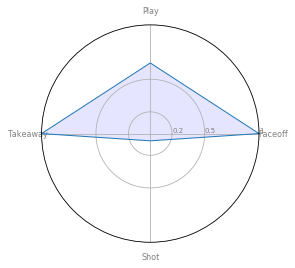

In [69]:
# number of variable
categories=["Faceoff", "Play", "Takeaway", "Shot"]
N = len(categories)
print(categories)
print (N)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:

# for name, value in name_performance.items():
#     print (value)
name = 'Emily Clark'
values = name_performance[name]
values += values[:1]
print (values)
print (len(values))
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

print (angles)
print (len(angles))
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.5,1], ["0.2","0.5","1"], color="grey", size=7)
plt.ylim(0,1)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)
